In [1]:
from tensorflow.keras.layers import Dense ,Conv2D, MaxPooling2D,Input, multiply,Layer
from tensorflow.keras import activations, initializers, regularizers
from tensorflow.keras.preprocessing import image
from tensorflow.keras.regularizers import l2
import numpy as np
import pandas as pd
import os
import json
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import statistics
from tensorflow.keras import backend as k
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.models import Model,model_from_json
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from scipy.stats import weibull_min
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test
from lifelines.utils import concordance_index
from scipy.stats import weibull_min,weibull_max
import pickle
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from string import ascii_uppercase
from pandas import DataFrame
import numpy as np
import seaborn as sn
from sklearn.metrics import confusion_matrix
from tensorflow.keras.layers import Layer

In [4]:
pd.read_pickle('paper_data/os_fig_12.pkl')

,Patient ID,fig,Stage,Type,Progression Free Status,Progress Free Survival (Months)
0,TCGA-F5-6861,TCGA-F5-6861-01A-01-BS1.579fc233-5fe6-4f86-860...,2,READ,0,38.136568
1,TCGA-F5-6861,TCGA-F5-6861-01A-01-BS1.579fc233-5fe6-4f86-860...,2,READ,0,38.136568
2,TCGA-F5-6861,TCGA-F5-6861-01A-01-BS1.579fc233-5fe6-4f86-860...,2,READ,0,38.136568
3,TCGA-F5-6861,TCGA-F5-6861-01A-01-BS1.579fc233-5fe6-4f86-860...,2,READ,0,38.136568
4,TCGA-F5-6861,TCGA-F5-6861-01A-01-BS1.579fc233-5fe6-4f86-860...,2,READ,0,38.136568
...,...,...,...,...,...,...
119441,TCGA-CI-6622,TCGA-CI-6622-01A-01-TS1.e2679d3e-5748-4572-a57...,2,READ,0,44.777591
119442,TCGA-CI-6622,TCGA-CI-6622-01A-01-TS1.e2679d3e-5748-4572-a57...,2,READ,0,44.777591
119443,TCGA-CI-6622,TCGA-CI-6622-01A-01-TS1.e2679d3e-5748-4572-a57...,2,READ,0,44.777591
119444,TCGA-CI-6622,TCGA-CI-6622-01A-01-TS1.e2679d3e-5748-4572-a57...,2,READ,0,44.777591


In [6]:
pd.read_pickle('paper_data/os_fig_12.pkl')

,Patient ID,fig,Stage,Type,Overall Survival Status,Overall Survival (Months)
0,TCGA-AD-6889,TCGA-AD-6889-01A-01-BS1.201e88a5-60ca-4555-a3f...,2,COAD,1,83.242923
1,TCGA-AD-6889,TCGA-AD-6889-01A-01-BS1.201e88a5-60ca-4555-a3f...,2,COAD,1,83.242923
2,TCGA-AD-6889,TCGA-AD-6889-01A-01-BS1.201e88a5-60ca-4555-a3f...,2,COAD,1,83.242923
3,TCGA-AD-6889,TCGA-AD-6889-01A-01-BS1.201e88a5-60ca-4555-a3f...,2,COAD,1,83.242923
4,TCGA-AD-6889,TCGA-AD-6889-01A-01-BS1.201e88a5-60ca-4555-a3f...,2,COAD,1,83.242923
...,...,...,...,...,...,...
125206,TCGA-EI-6514,TCGA-EI-6514-01A-01-TS1.a0076bf7-7626-488d-85a...,2,READ,0,16.306671
125207,TCGA-EI-6514,TCGA-EI-6514-01A-01-TS1.a0076bf7-7626-488d-85a...,2,READ,0,16.306671
125208,TCGA-EI-6514,TCGA-EI-6514-01A-01-TS1.a0076bf7-7626-488d-85a...,2,READ,0,16.306671
125209,TCGA-EI-6514,TCGA-EI-6514-01A-01-TS1.a0076bf7-7626-488d-85a...,2,READ,0,16.306671


In [2]:
def file_name(file_dir):  
    for root, dirs, files in os.walk(file_dir): 
        #print(root) #當前目錄路徑 
        #print(dirs) #當前路徑下所有子目錄 
        #print(files) #當前路徑下所有非目錄子檔案 
        return files

In [3]:
#要   改兩處!!!!

In [4]:
all_df=pd.read_pickle('paper_data/disease_free_CRC_5.pkl')#dfs_fig_feature_12

#clinical
with open("paper_data/disease_free_id_list.txt", "r") as file:
    dfs_crc = eval(file.readline())   

In [5]:
stage12_fold1_id=dfs_crc[0:64]
stage12_fold2_id=dfs_crc[64:128]
stage12_fold3_id=dfs_crc[128:192]
stage12_fold4_id=dfs_crc[192:256]
stage12_fold5_id=dfs_crc[256:319]

stage12_fold1= all_df[all_df['Patient ID'].isin(stage12_fold1_id)]
stage12_fold2= all_df[all_df['Patient ID'].isin(stage12_fold2_id)]
stage12_fold3= all_df[all_df['Patient ID'].isin(stage12_fold3_id)]
stage12_fold4= all_df[all_df['Patient ID'].isin(stage12_fold4_id)]
stage12_fold5= all_df[all_df['Patient ID'].isin(stage12_fold5_id)]

stage12_fold1=stage12_fold1.reset_index(drop=True)
stage12_fold2=stage12_fold2.reset_index(drop=True)
stage12_fold3=stage12_fold3.reset_index(drop=True)
stage12_fold4=stage12_fold4.reset_index(drop=True)
stage12_fold5=stage12_fold5.reset_index(drop=True)

In [6]:
train_df = pd.concat([stage12_fold1,stage12_fold2,stage12_fold4,stage12_fold5])
test_df = stage12_fold3
train_df=train_df.reset_index(drop=True)
test_df=test_df.reset_index(drop=True)

In [7]:
class DataGenerator(tf.keras.utils.Sequence):
    'Generates data for Keras'

    

    
    def __init__(self, patient_bar,feature_IDs, labels,status, batch_size=32, dim=(299,299), n_channels=3,
                 folder='train',shuffle=False):
        
        'Initialization'
        self.dim = dim
        self.batch_size = batch_size
        self.labels = labels
        self.status = status
        self.feature_IDs = feature_IDs
        self.patient_bar=patient_bar

        self.n_channels = n_channels
        self.shuffle = shuffle
        self.folder = folder
        self.on_epoch_end()

    def __len__(self):
        'Denotes the number of batches per epoch'
        return int(np.floor(len(self.patient_bar) / self.batch_size))

    def __getitem__(self, index):
        'Generate one batch of data'
        # Generate indexes of the batch
        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]
        
        # Find list of IDs
        patient_bar_temp = [self.patient_bar[k] for k in indexes]

        
       
        # Generate data
        X_person, y  = self.__data_generation(indexes)
        
       
        #xx = [X_img,X_protein]
        #print(len(xx),xx[0].shape,xx[1].shape)
        #print(y.shape)
        return X_person, y

    def on_epoch_end(self):
        'Updates indexes after each epoch'
        self.indexes = np.arange(len(self.patient_bar))
        if self.shuffle == True:
            np.random.shuffle(self.indexes)

    def __data_generation(self, patient_bar_temp):
        'Generates data containing batch_size samples' # X : (n_samples, *dim, n_channels)
        # Initialization
        
        #fig
        all_df=pd.read_pickle('paper_data/disease_free_CRC_5.pkl')
        
        #clinical
        with open("paper_data/disease_free_id_list.txt", "r") as file:
            os_crc = eval(file.readline())        
              
        #5fold
        stage12_fold1_id=dfs_crc[0:64]
        stage12_fold2_id=dfs_crc[64:128]
        stage12_fold3_id=dfs_crc[128:192]
        stage12_fold4_id=dfs_crc[192:256]
        stage12_fold5_id=dfs_crc[256:319]

        stage12_fold1= all_df[all_df['Patient ID'].isin(stage12_fold1_id)]
        stage12_fold2= all_df[all_df['Patient ID'].isin(stage12_fold2_id)]
        stage12_fold3= all_df[all_df['Patient ID'].isin(stage12_fold3_id)]
        stage12_fold4= all_df[all_df['Patient ID'].isin(stage12_fold4_id)]
        stage12_fold5= all_df[all_df['Patient ID'].isin(stage12_fold5_id)]

        stage12_fold1=stage12_fold1.reset_index(drop=True)
        stage12_fold2=stage12_fold2.reset_index(drop=True)
        stage12_fold3=stage12_fold3.reset_index(drop=True)
        stage12_fold4=stage12_fold4.reset_index(drop=True)
        stage12_fold5=stage12_fold5.reset_index(drop=True)     
        
        #select fold
        train_df = pd.concat([stage12_fold1,stage12_fold2,stage12_fold4,stage12_fold5])
        test_df = stage12_fold3
        train_df=train_df.reset_index(drop=True)
        test_df=test_df.reset_index(drop=True)
        
        
        real_day=list(train_df['Progress Free Survival (Months)'])
        day_mean=statistics.mean(real_day)
        day_std=statistics.stdev(real_day)
        Days_std=[((i -day_mean)/day_std)+1.6 for i in real_day]

        #fold1 +1.6
        train_df['dfs_days_std'] = Days_std
        train_df=train_df.reset_index(drop=True)

        test_day=list(test_df['Progress Free Survival (Months)'])
        Days_std_test=[((i -day_mean)/day_std)+1.6 for i in test_day]

        test_df['dfs_days_std'] = Days_std_test
        test_df=test_df.reset_index(drop=True)


        feature_columns=train_df.columns[-2048:]
        
        X_person = []
        
        y=[]
        y_d = []
        y_s = []

        # Generate data
        for i, ID in enumerate(patient_bar_temp):
            train_array=[]
            
            if self.folder == 'train_df':
                per_person=train_df.loc[train_df['Patient ID'] == self.patient_bar[ID]] #select a person
            
            else :
                per_person=test_df.loc[test_df['Patient ID'] == self.patient_bar[ID]] #select a person
                
            per_person_array=(per_person[feature_columns]).to_numpy() #per person features to array
            train_array.append(per_person_array)
            
            X_person.append(train_array)
            
            
            
            
            y_d.append(list(per_person['dfs_days_std'])[0])
            y_s.append(list(per_person['Progression Free Status'])[0])

            
            
        X_person = np.array(X_person).squeeze()
        
              
        y_d = np.array(y_d).astype('float')[:, np.newaxis]
        
        y_s = np.array(y_s).astype('int')[:, np.newaxis]
        y_temp = np.hstack((y_d, y_s))   
        
        y = tf.convert_to_tensor(y_temp, dtype=tf.float32)
        
        return X_person, y

In [8]:
class Mil_Attention(Layer):
    """
    Mil Attention Mechanism
    This layer contains Mil Attention Mechanism
    # Input Shape
        2D tensor with shape: (batch_size, input_dim)
    # Output Shape
        2D tensor with shape: (1, units)
    """

    def __init__(self, L_dim, output_dim, kernel_initializer='glorot_uniform', kernel_regularizer=None,
                    use_bias=True, use_gated=False, **kwargs):
        self.L_dim = L_dim
        self.output_dim = output_dim
        self.use_bias = use_bias
        self.use_gated = use_gated

        self.v_init = initializers.get(kernel_initializer)
        self.w_init = initializers.get(kernel_initializer)
        self.u_init = initializers.get(kernel_initializer)


        self.v_regularizer = regularizers.get(kernel_regularizer)
        self.w_regularizer = regularizers.get(kernel_regularizer)
        self.u_regularizer = regularizers.get(kernel_regularizer)

        super(Mil_Attention, self).__init__(**kwargs)

    def build(self, input_shape):
        assert len(input_shape) == 2
        input_dim = input_shape[1]

        self.V = self.add_weight(shape=(input_dim, self.L_dim),
                                      initializer=self.v_init,
                                      name='v',
                                      regularizer=self.v_regularizer,
                                      trainable=True)


        self.w = self.add_weight(shape=(self.L_dim, 1),
                                    initializer=self.w_init,
                                    name='w',
                                    regularizer=self.w_regularizer,
                                    trainable=True)


        if self.use_gated:
            self.U = self.add_weight(shape=(input_dim, self.L_dim),
                                     initializer=self.u_init,
                                     name='U',
                                     regularizer=self.u_regularizer,
                                     trainable=True)
        else:
            self.U = None

        self.input_built = True


    def call(self, x, mask=None):
        n, d = x.shape
        ori_x = x
        # do Vhk^T
        x = k.tanh(k.dot(x, self.V)) # (2,64)

        if self.use_gated: #no gate
            gate_x = k.sigmoid(k.dot(ori_x, self.U))
            ac_x = x * gate_x
        else:
            ac_x = x

        # do w^T x
        soft_x = k.dot(ac_x, self.w)  # (2,64) * (64, 1) = (2,1)
        alpha = k.softmax(k.transpose(soft_x)) # (2,1)  #change
        alpha = k.transpose(alpha)
        return alpha

    def compute_output_shape(self, input_shape):
        shape = list(input_shape)
        assert len(shape) == 2
        shape[1] = self.output_dim
        return tuple(shape)

    def get_config(self):
        config = {
            'output_dim': self.output_dim,
            'v_initializer': initializers.serialize(self.V.initializer),
            'w_initializer': initializers.serialize(self.w.initializer),
            'v_regularizer': regularizers.serialize(self.v_regularizer),
            'w_regularizer': regularizers.serialize(self.w_regularizer),
            'use_bias': self.use_bias
        }
        base_config = super(Mil_Attention, self).get_config()
        return dict(list(base_config.items()) + list(config.items()))


class Last_Sigmoid(Layer):
    """
    Attention Activation
    This layer contains a FC layer which only has one neural with sigmoid actiavtion
    and MIL pooling. The input of this layer is instance features. Then we obtain
    instance scores via this FC layer. And use MIL pooling to aggregate instance scores
    into bag score that is the output of Score pooling layer.
    This layer is used in mi-Net.
    # Arguments
        output_dim: Positive integer, dimensionality of the output space
        kernel_initializer: Initializer of the `kernel` weights matrix
        bias_initializer: Initializer of the `bias` weights
        kernel_regularizer: Regularizer function applied to the `kernel` weights matrix
        bias_regularizer: Regularizer function applied to the `bias` weights
        use_bias: Boolean, whether use bias or not
        pooling_mode: A string,
                      the mode of MIL pooling method, like 'max' (max pooling),
                      'ave' (average pooling), 'lse' (log-sum-exp pooling)
    # Input shape
        2D tensor with shape: (batch_size, input_dim)
    # Output shape
        2D tensor with shape: (1, units)
    """
    def __init__(self, output_dim, kernel_initializer='glorot_uniform', bias_initializer='zeros',
                    kernel_regularizer=None, bias_regularizer=None,
                    use_bias=True, **kwargs):
        self.output_dim = output_dim

        self.kernel_initializer = initializers.get(kernel_initializer)
        self.bias_initializer = initializers.get(bias_initializer)
        self.kernel_regularizer = regularizers.get(kernel_regularizer)
        self.bias_regularizer = regularizers.get(bias_regularizer)

        self.use_bias = use_bias
        super(Last_Sigmoid, self).__init__(**kwargs)

    def build(self, input_shape):
        assert len(input_shape) == 2
        input_dim = input_shape[1]

        self.kernel = self.add_weight(shape=(input_dim, self.output_dim),
                                        initializer=self.kernel_initializer,
                                        name='kernel',
                                        regularizer=self.kernel_regularizer)

        if self.use_bias:
            self.bias = self.add_weight(shape=(self.output_dim,),
                                        initializer=self.bias_initializer,
                                        name='bias',
                                        regularizer=self.bias_regularizer)
        else:
            self.bias = None

        self.input_built = True
    
    def activate(ab):
        a = k.exp(ab[:, 0])
        b = k.softplus(ab[:, 1])
        a = k.reshape(a, (k.shape(a)[0], 1))
        b = k.reshape(b, (k.shape(b)[0], 1))
        return k.concatenate((a, b), axis=1)

    def call(self, x, mask=None):
        n, d = x.shape
        x = k.sum(x, axis=0, keepdims=True)
        # compute instance-level score
        x = k.dot(x, self.kernel)
        if self.use_bias:
            x = k.bias_add(x, self.bias)

        # sigmoid
        out = activate(x) #change


        return out

    def compute_output_shape(self, input_shape):
        shape = list(input_shape)
        assert len(shape) == 2
        shape[1] = self.output_dim
        return tuple(shape)

    def get_config(self):
        config = {
            'output_dim': self.output_dim,
            'kernel_initializer': initializers.serialize(self.kernel.initializer),
            'bias_initializer': initializers.serialize(self.bias_initializer),
            'kernel_regularizer': regularizers.serialize(self.kernel_regularizer),
            'bias_regularizer': regularizers.serialize(self.bias_regularizer),
            'use_bias': self.use_bias
        }
        base_config = super(Last_Sigmoid, self).get_config()
        return dict(list(base_config.items()) + list(config.items()))

In [9]:
real_day=list(train_df['Progress Free Survival (Months)'])
day_mean=statistics.mean(real_day)
day_std=statistics.stdev(real_day)
Days_std=[((i -day_mean)/day_std)+1.6 for i in real_day]

#fold1 +1.6
train_df['dfs_days_std'] = Days_std
train_df=train_df.reset_index(drop=True)

test_day=list(test_df['Progress Free Survival (Months)'])
Days_std_test=[((i -day_mean)/day_std)+1.6 for i in test_day]

test_df['dfs_days_std'] = Days_std_test
test_df=test_df.reset_index(drop=True)

In [10]:
train_fig = train_df['fig'] #train_whole_protein_rna_fig
train_labels = train_df['dfs_days_std']
train_status = train_df['Progression Free Status']
train_bar= list(set(train_df['Patient ID']))
#train_bar= train_df['bcr_patient_barcode']#train_whole_protein_rna_bar

test_fig = test_df['fig']#test_whole_protein_rna_fig
test_labels = test_df['dfs_days_std']
test_status = test_df['Progression Free Status']
test_bar= list(set(test_df['Patient ID']))
#test_bar= test_df['bcr_patient_barcode']#test_whole_protein_rna_bar

In [11]:
# Parameters
params_train = {'dim': (299,299),'batch_size': 1,'n_channels': 3,'shuffle': False,'folder':'train_df'}
params_test = {'dim': (299,299),'batch_size': 1,'n_channels': 3,'shuffle': False,'folder':'test_df'}

In [12]:
# Generators
training_generator = DataGenerator(train_bar,train_fig, train_labels,train_status, **params_train ) #**表示可棟
validation_generator = DataGenerator(test_bar,test_fig, test_labels,test_status, **params_test)

In [13]:


def weibull_loglik_discrete(y_true, ab_pred, name=None):
    y_ = y_true[:, 0]
    u_ = y_true[:, 1]
    a_ = ab_pred[:, 0]
    b_ = ab_pred[:, 1]
    #print(y_, u_, a_, b_)
    hazard0 = k.pow((y_ + 1e-35) / a_, b_)
    hazard1 = k.pow((y_ + 1) / a_, b_)
    return -1 * k.mean(u_ * k.log(k.exp(hazard1 - hazard0) - 1.0) - hazard1)


def weibull_loglik_continuous(y_true, ab_pred, name=None):
    y_ = y_true[:, 0]
    u_ = y_true[:, 1]
    a_ = ab_pred[:, 0]
    b_ = ab_pred[:, 1]  # death / live
#     k.print_tensor(y_,message='y_')
#     k.print_tensor(u_,message='u_')
#     k.print_tensor(a_,message='a_')
#     k.print_tensor(b_,message='b_')
    #print(y_[0], u_[0], a_[0], b_[0])
    ya = (y_ + 1e-35) / a_
#    k.print_tensor(ya,message='ya')
    return -1 * k.mean(u_ * (k.log(b_) + b_ * k.log(ya)) - k.pow(ya, b_))


def activate(ab):
    a = k.exp(ab[:, 0])
    b = k.softplus(ab[:, 1])
    a = k.reshape(a, (k.shape(a)[0], 1))
    b = k.reshape(b, (k.shape(b)[0], 1))
    return k.concatenate((a, b), axis=1)


In [14]:
data_input = Input(shape=(2048), dtype='float32', name='input')
alpha = Mil_Attention(L_dim=2048, output_dim=2, kernel_regularizer=l2(0.000001), name='alpha', use_gated='False')(data_input)
x_mul = multiply([alpha, data_input])
out = Last_Sigmoid(output_dim=2, name='FC1_sigmoid')(x_mul)
x_out = out
#gap = GlobalAveragePooling2D()(x_out)
#x = Dense(2, activation='relu')(x_out)
#x = Dense(2, activate)(x_out)
model = Model(inputs=data_input, outputs=x_out)

# for layer in base_model.layers:
#     layer.trainable = False


In [15]:
#model.load_weights('/work/mil_weight/0719_mil_test5_4.h5')

In [16]:
from tensorflow .keras.optimizers import SGD,Adam

In [17]:
#model.compile(loss=weibull_loglik_continuous,  optimizer=Adam(lr=0.00001, beta_1=0.9, beta_2=0.999))

In [18]:
# model.compile(loss=weibull_loglik_continuous,  optimizer=RMSprop(lr=1e-5, momentum=0.9, decay=0.5))#1e-6

In [19]:
# model.compile(loss=weibull_loglik_continuous,  optimizer=RMSprop(lr=1e-5))

In [20]:
#model.compile(loss=weibull_loglik_continuous,  optimizer=RMSprop(lr=0.00001,rho=0.9, epsilon=None, decay=0.0))

In [21]:
model.compile(loss=weibull_loglik_continuous,  optimizer=SGD(lr=0.00001, decay=1e-7, momentum=0.9, nesterov=True))

In [22]:
model.fit(training_generator,
          validation_data=validation_generator,
          epochs=1,
          
         )

255/255 [==============================] - 427s 2s/step - loss: 1.1295 - val_loss: 0.6383


In [46]:
model.load_weights('paper/weight/0822_test5_1_1.h5')

In [47]:
probabilities = model.predict(training_generator)

In [48]:
data = {'Patient ID':  train_bar}
infer_train_df = pd.DataFrame (data, columns = ['Patient ID'])

train_origin=train_df[['Patient ID','Progress Free Survival (Months)','dfs_days_std','Progression Free Status']].drop_duplicates(subset=['Patient ID'], keep='last')
infer_train_df = pd.merge(infer_train_df, train_origin, on=['Patient ID'])

In [49]:

train_predict = np.resize(probabilities, (len(infer_train_df) , 2))



train_result = np.concatenate((np.array(infer_train_df['Progress Free Survival (Months)'])[:, np.newaxis], train_predict), axis=1)

predict_list=[]
kappa_list=[]
lambda_list=[]
for i in range(0,len(train_result)):
#pdf peak
#     x = np.arange(0,15,0.0001)
#     per_list=weibull_min.pdf(x, scale=train_result[i][1], c=train_result[i][2])
#     per=x[np.argmax(per_list)]
    
#cdf 0.5
    per=weibull_min.ppf(0.5, scale=train_result[i][1], c=train_result[i][2])

#pdf monte carlo 10000 - y
#     x = [random.uniform(0, 15) for i in range(20000)]
#     per_list=weibull_min.pdf(x, scale=train_result[i][1], c=train_result[i][2])
#     #new_list = np.append(per_list, per)
#     per=statistics.mean(per_list)

#pdf monte carlo 10000 - x
#     x = np.arange(0,15,0.0001)
#     per_list=weibull_min.pdf(x, scale=train_result[i][1], c=train_result[i][2])
#     per_list=per_list/sum(per_list)
#     x_list = np.random.choice(x,size=10000, p = per_list.ravel())
# #     per=statistics.mean(per_list)
#     per=stats.mode(x_list)[0][0]
    
    
    kappa=train_result[i][2]
    lamda=train_result[i][1]
    kappa_list.append(kappa)
    lambda_list.append(lamda)
    predict_list.append(per)

infer_train_df['predict_std_day']=predict_list
infer_train_df['lambda']=lambda_list
infer_train_df['kappa']=kappa_list


#C-index


In [58]:
print(concordance_index(infer_train_df['Progress Free Survival (Months)'], infer_train_df['predict_std_day'], infer_train_df['Progression Free Status']))

0.6300494042429526


In [51]:
probabilities_test = model.predict(validation_generator)

In [79]:
data_test = {'Patient ID':  test_bar}
infer_test_df = pd.DataFrame (data_test, columns = ['Patient ID'])

test_origin=test_df[['Patient ID','Progress Free Survival (Months)','dfs_days_std','Progression Free Status']].drop_duplicates(subset=['Patient ID'], keep='last')
infer_test_df = pd.merge(infer_test_df, test_origin, on=['Patient ID'])

In [80]:

test_predict = np.resize(probabilities_test, (len(infer_test_df) , 2))



test_result = np.concatenate((np.array(infer_test_df['Progress Free Survival (Months)'])[:, np.newaxis], test_predict), axis=1)

predict_list=[]
kappa_list=[]
lambda_list=[]
for i in range(0,len(test_result)):
#pdf peak
#     x = np.arange(0,15,0.0001)
#     per_list=weibull_min.pdf(x, scale=train_result[i][1], c=train_result[i][2])
#     per=x[np.argmax(per_list)]
    
#cdf 0.5
    per=weibull_min.ppf(0.5, scale=test_result[i][1], c=test_result[i][2])

#pdf monte carlo 10000 - y
#     x = [random.uniform(0, 15) for i in range(20000)]
#     per_list=weibull_min.pdf(x, scale=train_result[i][1], c=train_result[i][2])
#     #new_list = np.append(per_list, per)
#     per=statistics.mean(per_list)

#pdf monte carlo 10000 - x
#     x = np.arange(0,15,0.0001)
#     per_list=weibull_min.pdf(x, scale=train_result[i][1], c=train_result[i][2])
#     per_list=per_list/sum(per_list)
#     x_list = np.random.choice(x,size=10000, p = per_list.ravel())
# #     per=statistics.mean(per_list)
#     per=stats.mode(x_list)[0][0]
    
    
    kappa=test_result[i][2]
    lamda=test_result[i][1]
    kappa_list.append(kappa)
    lambda_list.append(lamda)
    predict_list.append(per)

infer_test_df['predict_std_day']=predict_list
infer_test_df['lambda']=lambda_list
infer_test_df['kappa']=kappa_list


#C-index


In [81]:
print(concordance_index(infer_test_df['Progress Free Survival (Months)'], infer_test_df['predict_std_day'], infer_test_df['Progression Free Status']))

0.8346774193548387


In [62]:

med_day=np.median(list(infer_train_df['predict_std_day']))
med_day

0.694415598226571

In [61]:

med_day=np.median(list(infer_test_df['predict_std_day']))
med_day

0.7293504021646051

In [1]:

#4 currrent


In [40]:
# model.save_weights('paper/weight/0824_test3_1_1.h5')

In [82]:
# infer_test_df.to_pickle('paper/TCGA/0822_test5_1_1.pkl')

In [ ]:
from collections import Counter

In [ ]:
c=Counter(all_df['TumorID'])

In [19]:
infer_test_df=pd.read_pickle('paper/TCGA/0822_test5_1_1.pkl')
print(concordance_index(infer_test_df['Progress Free Survival (Months)'], infer_test_df['predict_std_day'], infer_test_df['Progression Free Status']))

0.8346774193548387


In [20]:
med_day=np.median(list(infer_test_df['predict_std_day']))
med_day

0.7293504021646051

In [21]:
infer_test_df

,Patient ID,Progress Free Survival (Months),dfs_days_std,Progression Free Status,predict_std_day,lambda,kappa
0,TCGA-AA-3986,19.068284,1.294612,0,0.746360,1.132432,0.879107
1,TCGA-AA-3495,37.051649,2.108897,0,0.837205,1.261706,0.893605
2,TCGA-F4-6570,6.180754,0.711066,0,0.515321,0.813614,0.802531
3,TCGA-CM-6171,14.038202,1.066850,0,0.629584,0.999928,0.792246
4,TCGA-AA-3660,78.081336,3.966717,0,0.926265,1.371532,0.933737
...,...,...,...,...,...,...,...
59,TCGA-AG-A01Y,0.000000,0.431202,0,0.528927,0.843967,0.784384
60,TCGA-AA-A01G,11.999868,0.974555,0,0.623401,1.003527,0.769845
61,TCGA-AG-3881,19.035408,1.293123,0,0.738756,1.122576,0.875958
62,TCGA-DM-A0X9,119.702798,5.851333,0,0.979382,1.467978,0.905597


In [22]:
# n:lambda  a:kappa
def weib(x,a,n):
    return (a / n) * (x / n)**(a - 1) * np.exp(-(x / n)**a)

In [ ]:
#count, bins, ignored = plt.hist(np.random.weibull(5.,1000))

plt.axis([0, 13, 0, 0.5])
for i in range(0,len(infer_test_df)):
    x = np.arange(0,100,0.1)
    plt.plot(x, weib(x, infer_test_df['kappa'][i], infer_test_df['lambda'][i]))
plt.show()


In [14]:
med_day=np.median(list(infer_train_df['predict_std_day']))
med_day

NameError: name 'infer_train_df' is not defined

In [23]:
med_day=0.694415598226571

In [24]:
infer_test_df["group"]=''

for i in range(0,len(infer_test_df)):
    if infer_test_df['predict_std_day'][i] > med_day :
        infer_test_df["group"][i]=1 #big
    else :
        infer_test_df["group"][i]=0 #small

<ipython-input-24-eafeaa424663>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  infer_test_df["group"][i]=1 #big
<ipython-input-24-eafeaa424663>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  infer_test_df["group"][i]=0 #small


In [25]:
result=infer_test_df

In [26]:
T_big=[]
T_small=[]
E_big=[]
E_small=[]
for i in range(0,len(result)):
    if result['group'][i]==1: #big
        T_big.append(result['Progress Free Survival (Months)'][i])
        E_big.append(result['Progression Free Status'][i])
    else: #small
        T_small.append(result['Progress Free Survival (Months)'][i])
        E_small.append(result['Progression Free Status'][i])        

In [27]:
logrank_results = logrank_test(T_big, T_small, event_observed_A=E_big, event_observed_B=E_small)

In [28]:
logrank_results

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           5.53 0.02      5.74

In [29]:
kmf = KaplanMeierFitter()
# T_small_day = [(x-1.6)*day_std+day_mean-1 for x in T_small]
# T_big_day = [(x-1.6)*day_std+day_mean-1 for x in T_big]

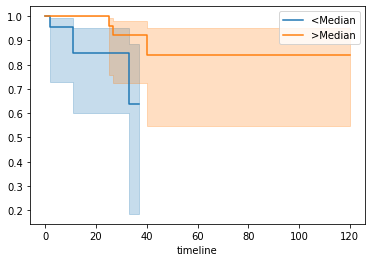

In [31]:
ax = plt.subplot(111)



kmf.fit(T_small, event_observed=E_small, label="<Median")
kmf.plot(ax=ax)

kmf.fit(T_big, event_observed=E_big, label=">Median")
kmf.plot(ax=ax)

plt.title("");

plt.savefig("dfs_tcga.svg", format="svg")